In [3]:
from numpy import *
from pandas import *
from seaborn import *
from sklearn.datasets import *
from sklearn.model_selection import *
from sklearn.linear_model import *
from sklearn.metrics import *
from sklearn.feature_extraction.text import *

In [4]:
data = read_csv(r"C:\Users\FAISAL-PC\Downloads\twitter_training.csv\twitter_training.csv.csv",header=None)
data.columns = ["ID","Entity","Emotion","Tweet"]
data.head()

,ID,Entity,Emotion,Tweet
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [6]:
data.describe()

,ID
count,74682.000000
mean,6432.586165
std,3740.427870
min,1.000000
25%,3195.000000
50%,6422.000000
75%,9601.000000
max,13200.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   ID       74682 non-null  int64 
 1   Entity   74682 non-null  object
 2   Emotion  74682 non-null  object
 3   Tweet    73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [8]:
data.isnull().sum()

ID           0
Entity       0
Emotion      0
Tweet      686
dtype: int64

In [9]:
data.isna().sum()

ID           0
Entity       0
Emotion      0
Tweet      686
dtype: int64

In [10]:
import re
#Define text cleaning Function
def clean(text):
    text = re.sub(r'http\S+','',text)
    text = re.sub(r'@/w+','',text)
    text = re.sub(r'[A-Za-z0-9]+','',text)
    text = text.lower().strip()
    return text

data['Tweet'] = data['Tweet'].astype(str).apply(clean)
data.dropna(subset=['Emotion'],inplace=True)

sentiment_mapping = {"Positive":1,"Negative":0,"Nuetral":2}
data['Emotion'] = data['Emotion'].map(sentiment_mapping)

data.dropna(subset=["Emotion"],inplace=True)
data['Emotion'] = data['Emotion'].astype(int)
print("\nUnique sentiment values after encoding:", data['Emotion'].unique())


Unique sentiment values after encoding: [1 0]


In [11]:
vectorizer = TfidfVectorizer(max_features=15000, stop_words='english', ngram_range=(1,2))
X = vectorizer.fit_transform(data['Tweet'])
y = data['Emotion']

print("Shape of feature matrix:", X.shape)

Shape of feature matrix: (43374, 110)


In [12]:
x_train , x_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print("Training set size:",x_train.shape)
print('Testing set size:',x_test.shape)

Training set size: (34699, 110)
Testing set size: (8675, 110)


In [13]:
model = LogisticRegression(max_iter=2000)

# Define parameter grid for tuning
parameters = {'C': [0.01, 0.1, 1, 10, 50, 100]}

# Perform Grid Search to find best hyperparameters
grid_search = GridSearchCV(model, parameters, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

# Get best parameter
best_param = grid_search.best_params_
print("Best Parameters:", best_param)

# Train final model using best parameter
best_model = LogisticRegression(C=best_param['C'], max_iter=2000)
best_model.fit(x_train, y_train)

# Make predictions on test data
y_pred = best_model.predict(x_test)

Best Parameters: {'C': 10}


In [14]:
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

print("Classification Report:\n", classification_report(y_test, y_pred))

Model Accuracy: 0.5284149855907782
Classification Report:
               precision    recall  f1-score   support

           0       0.53      1.00      0.69      4577
           1       0.89      0.00      0.00      4098

    accuracy                           0.53      8675
   macro avg       0.71      0.50      0.35      8675
weighted avg       0.70      0.53      0.37      8675



C:\Users\FAISAL-PC\AppData\Local\Temp\ipykernel_8932\4224272694.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  countplot(x='Emotion', data=data, palette='viridis')


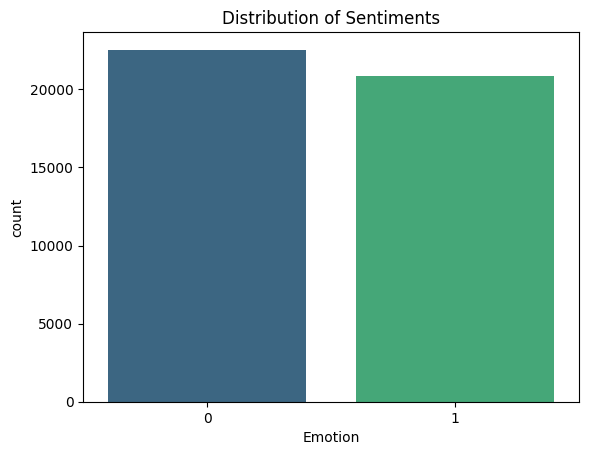

In [16]:
from matplotlib.pyplot import *
from seaborn import *
countplot(x='Emotion', data=data, palette='viridis')
title("Distribution of Sentiments")
show()